In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/home/sakrishnaa20/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/home/sakrishnaa20/humancell_dataset_170_stimulus_longSq.pkl
/home/sakrishnaa20/kernel7460a63b7b-2.ipynb
/home/sakrishnaa20/.bash_logout
/home/sakrishnaa20/.profile
/home/sakrishnaa20/.bashrc
/home/sakrishnaa20/tranfer_learning_predict_ages.ipynb
/home/sakrishnaa20/checkpoint_conv1d_lstm_1.keras
/home/sakrishnaa20/noise1_conv_model_actlen.keras
/home/sakrishnaa20/.bash_history
/home/sakrishnaa20/checkpoint_conlv1D_fina.keras
/home/sakrishnaa20/checkpoint_conv1d.keras
/home/sakrishnaa20/human_cells_170_stimulus.pkl
/home/sakrishnaa20/checkpoint_recons_noise1_conv_model.keras
/home/sakrishnaa20/.viminfo
/home/sakrishnaa20/noise1_conv_model.keras
/home/sakrishnaa20/data_frame_sti170.pkl
/home/sakrishnaa20/checkpoint.keras
/home/sakrishnaa20/recons_response.ipynb
/home/sakrishnaa20/.png
/home/sakrishnaa20/vol_noise_1.npy
/home/sakrishnaa20/checkpoint_conv1d_lstm.keras
/home/sakrishnaa20/logs/train/events.out.tfevents.1581579575.tensorflow-1-vm.4112.81682.v2
/home/sakrishnaa20/logs/train/ev

/home/sakrishnaa20/.cache/pip/selfcheck/241e69162522ccf5846a2f42ebc24b17464915a155679666b89a9f31
/home/sakrishnaa20/.cache/pip/http/a/1/9/5/3/a19537d3cf37c122db841d6fe4cd322bc10d1a558bb00d146b85cb9a
/home/sakrishnaa20/.cache/pip/http/c/c/7/d/9/cc7d90393056161cbf5bd78330741c34f93bb308e1bca7fbbfe59d5b
/home/sakrishnaa20/.cache/pip/http/c/c/1/3/3/cc133da5701a066bc3777b2575e0daa601596f19871db4608ca98b97
/home/sakrishnaa20/.cache/pip/http/c/d/5/d/e/cd5de44b899cbe1869765c21b55cffc53c0c0ffa9d3c6f1fd40a42a2
/home/sakrishnaa20/.cache/pip/http/3/5/3/8/0/353804fb5c9ac91db4f03956a3d4b71568ad650427ded1640d0848b4
/home/sakrishnaa20/.cache/pip/http/4/6/7/4/4/46744c10f47466e16992700d330fc51a528bd20b5b55db30d5267d4b
/home/sakrishnaa20/.cache/pip/http/1/9/8/d/7/198d78abb0c5b6de23247c998e7a8cafc050fbabcc04c3e60796dced
/home/sakrishnaa20/.cache/jedi/CPython-35-32/36715319fe4a3b1b3277ff703c26d34fe62107ced96fbf165adfeb9ce38faff2-40aae83cf39a536e5c42c83abf281c1eb46b8bf0d8b19e7740dfe058c5f8fc2e.pkl
/home/sakr

/home/sakrishnaa20/.git/objects/44/7c39d3e045444e8dff16a3abd82bd81a34908f
/home/sakrishnaa20/.git/objects/60/4d5e06189e99bcb3e4c3bc1f748d4ff9f35d7d
/home/sakrishnaa20/.git/objects/dd/2e4b24fd1028c1c9438fbde26959865007bfb4
/home/sakrishnaa20/.git/objects/bb/c74f815e257204719fc09471df58d9b09db2ba
/home/sakrishnaa20/.git/objects/dc/f0973c6641e69deae1c0fd95c9fd2b57335017
/home/sakrishnaa20/.git/objects/a0/4a1b8f25f206e9c5508935eb0f491cce22ea4b
/home/sakrishnaa20/.git/objects/33/19fdff82089d9ebde4455c5a9ab363c24c8d1d
/home/sakrishnaa20/.git/objects/9f/3d3b250afd5c8d6c70701084bbfe97010447fb
/home/sakrishnaa20/.git/objects/f4/bb3692d3a4c0aac48c5ac8fb1445a43e8a8a87
/home/sakrishnaa20/.git/objects/17/5aa2c506722774394d6e891de269a6eb10d9bb
/home/sakrishnaa20/.git/objects/c1/cbf23617af4271c7dad8c9c9f3e523f5feeda8
/home/sakrishnaa20/.git/objects/47/7961a582201f23a88b2e45e60de678671c7f55
/home/sakrishnaa20/.git/objects/06/24b86fa8d79dba8fd7d2161eafd6287b79d9c5
/home/sakrishnaa20/.git/objects/a2/33d

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


df = pd.read_pickle("/home/sakrishnaa20/data_frame_sti170.pkl")

time_df= pd.DataFrame(data=df["time"])
stimulus_df=pd.DataFrame(data=df["stimulus"])
xdf=time_df.join(stimulus_df)

x_data=xdf.values[0:,]
# x_data
y_data = df["response"].values[0:,]
# len(y_data)

y_data = y_data.reshape(-1, 1)
print(type(y_data))
print("Shape:", y_data.shape)
# y_data.reshape((400750,1))
# y_data
print("Shape:", y_data.shape)

num_data = len(x_data)

num_train = 1800*50500

num_test = num_data - num_train
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
# len(x_train) + len(x_test)
# x_train

y_train = y_data[0:num_train]
y_test = y_data[num_train:]
# len(y_train) + len(y_test)

num_x_signals = x_data.shape[1]
num_y_signals=y_data.shape[1]
batch_size = 256
sequence_length = 50500



Using TensorFlow backend.


<class 'numpy.ndarray'>
Shape: (101858500, 1)
Shape: (101858500, 1)


In [3]:
time_df= pd.DataFrame(data=df["time"])
stimulus_df=pd.DataFrame(data=df["stimulus"])
xdf=time_df.join(stimulus_df)

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

try:
    df = pd.read_pickle("/home/sakrishnaa20/data_frame_sti170.pkl")
except EOFError:
    df = list()

subsample=20
batch_size = 256
# sequence_length = 2525
sequence_length = 50500
x_data = df["response"].values[0::,]
# len(y_data)
y_data = df["response"].values[0::,]
y_data = y_data.reshape(-1, 1)
x_data = x_data.reshape(-1, 1)
print(type(y_data))
print("input Shape:", x_data.shape)
# y_data.reshape((400750,1))
# y_data
print("output Shape:", y_data.shape)

num_data = len(x_data)

num_train = 1800*sequence_length

num_test = num_data - num_train
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
# len(x_train) + len(x_test)
# x_train

y_train = y_data[0:num_train]
y_test = y_data[num_train:]
# len(y_train) + len(y_test)

num_x_signals = x_data.shape[1]
num_y_signals=y_data.shape[1]


Using TensorFlow backend.


<class 'numpy.ndarray'>
input Shape: (101858500, 1)
output Shape: (101858500, 1)


In [67]:
x_train.shape

(90900000, 1)

In [164]:
x=x_data[0:50500]
x=x[0::20]/100
len(x)

2525

In [6]:
y=x_data[0:50500]
y=y[0::20]/100
len(y)
y=y.reshape(1,2525,1)

In [7]:
y.shape

(1, 2525, 1)

In [165]:
subsequences = 5
timesteps = x.shape[0]//subsequences
x= x.reshape((subsequences, timesteps, x.shape[1]))

In [166]:
x.shape

(5, 505, 1)

In [5]:
x_val=x_data[50500:50500+50500]
x_val=x_val[0::20]/100
print(len(x_val))
sequence_length=len(x_val)
x_val=x_val.reshape(1,x_val.shape[0],x_val.shape[1])
x_val



2525


array([[[-0.7471875 ],
        [-0.748125  ],
        [-0.748125  ],
        ...,
        [-0.55625004],
        [-0.55468756],
        [-0.555625  ]]], dtype=float32)

In [6]:
x=x.reshape(1,x.shape[0],x.shape[1])
x

array([[[-0.701875  ],
        [-0.7025001 ],
        [-0.701875  ],
        ...,
        [-0.45906255],
        [-0.4578125 ],
        [-0.4571875 ]]], dtype=float32)

In [48]:
x.shape

(1, 2525, 1)

In [8]:
x_batch=y

In [9]:
x_batch.shape

(1, 2525, 1)

In [112]:
from tensorflow.keras.layers import Input, Dense, LSTM, RepeatVector,TimeDistributed, Flatten,Bidirectional,Conv1D, GRU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Concatenate, concatenate
from keras.initializers import RandomNormal, lecun_normal

def get_model():
    num_units=512
#     model = Sequential()
    input_layer = Input(shape=(x_batch.shape[1], x_batch.shape[2]))
    # encoder
#     conv=TimeDistributed(Conv1D(filters=1, kernel_size=128, padding="same",activation='relu'))(input_layer)
#     conv=TimeDistributed(Flatten())(conv)
    
    lstm1 = Bidirectional(GRU(return_sequences=False, units=num_units))(input_layer)
    lstm2 = Bidirectional(GRU(return_sequences=False, units=num_units))(input_layer)
    encoded = concatenate([lstm1, lstm2], axis=-1)

    rep_vec = RepeatVector(x_batch.shape[1])(encoded)

    # layer 2
    lstm3 = Bidirectional(GRU(return_sequences=True, units=num_units))(rep_vec)
    lstm4 =Bidirectional(GRU(return_sequences=True, units=num_units))(rep_vec)
    merge2 = concatenate([lstm3, lstm4], axis=-1)
    time=TimeDistributed(Dense(1))(merge2)
#     dense=Dense(1,activation="relu")(merge2)
    
    autoencoder = Model(input_layer, time)

    print(autoencoder.summary())
    return autoencoder



In [11]:
import matplotlib.pyplot as plt
from keras import optimizers
lr = 0.001
adam = optimizers.Adam(lr)
model = get_model()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2525, 1)]    0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 1024)         1582080     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 1024)         1582080     input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 2048)         0           bidirectional[0][0]              
                                                                 bidirectional_1[0][0]        

In [185]:
model.compile(loss='mean_squared_error', optimizer= adam)

# for i in range(25):
model.fit(y, y,
        epochs=150,
        batch_size=64,
        shuffle=False,
        )


Epoch 1/100


KeyboardInterrupt: 

In [ ]:
# len(list_duplicates(ran))
!pip install tensorflow


In [4]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import random
# from tf.keras.util import normalize
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """
    idx=[]
    y_scaler = StandardScaler()
    for i in range(0,num_train,sequence_length):
        idx.append(i)
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float64)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float64)
        
        
        # Fill the batch with random sequences of data.
        idxx=0
        remove_list=[]
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            
            idxx = random.choice(idx)
            idx.remove(idxx)
            remove_list.append(idxx)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train[idxx:idxx+sequence_length]
            y_batch[i] = y_train[idxx:idxx+sequence_length]
            y_batch[i] =  y_scaler.fit_transform(y_batch[i])
            x_batch[i] =  y_scaler.fit_transform(x_batch[i])
#             y_batch[i]=y_batch[i][0]/100
#             x_batch[i]=x_batch[i][0]/100
        
        for i in remove_list:
            idx.append(i)
            
#         subsequences = 1
#         timesteps = x_batch.shape[1]//subsequences
#         x_batch= x_batch.reshape((x_batch.shape[0], timesteps, x_batch.shape[2]))
#         y_batch=y_batch.reshape((y_batch.shape[0],y_batch.shape[1],y_batch.shape[2]))
        subsequences = 5
        timesteps = x_batch.shape[1]//subsequences
        x_batch= x_batch.reshape((x_batch.shape[0],subsequences, timesteps, x_batch.shape[2]))
        y_batch=y_batch.reshape((y_batch.shape[0],subsequences, timesteps,y_batch.shape[2]))

        yield (x_batch, y_batch)

In [5]:
def test_batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of testing-data.
    """
    test_idx=[]
    y_scaler = StandardScaler()
    for i in range(0,num_test,sequence_length):
        test_idx.append(i)
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_test_batch = np.zeros(shape=x_shape, dtype=np.float64)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_test_batch = np.zeros(shape=y_shape, dtype=np.float64)
        
        
        # Fill the batch with random sequences of data.
        for i in range(batch_size):
#         for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            
            idxx = random.choice(test_idx)
            test_idx.remove(idxx)
            
            # Copy the sequences of data starting at this index.
            x_test_batch[i] = x_test[idxx:idxx+sequence_length]
            y_test_batch[i] = y_test[idxx:idxx+sequence_length]
            y_test_batch[i] =  y_scaler.fit_transform(y_test_batch[i])
            x_test_batch[i] =  y_scaler.fit_transform(x_test_batch[i])
#             y_test_batch[i]=y_test_batch[i]/100
#             x_test_batch[i]=x_test_batch[i]/100
        
        for i in range(0,num_test,sequence_length):
            test_idx.append(i)
            
        subsequences = 5
        timesteps = x_test_batch.shape[1]//subsequences
        x_test_batch= x_test_batch.reshape((x_test_batch.shape[0],subsequences, timesteps, x_test_batch.shape[2]))
        y_test_batch=y_test_batch.reshape((y_test_batch.shape[0],subsequences,timesteps, y_test_batch.shape[2]))

        yield (x_test_batch, y_test_batch)

In [6]:
test_generator = test_batch_generator(batch_size=4,
                            sequence_length=sequence_length)

In [7]:
generator = batch_generator(batch_size=16,
                            sequence_length=sequence_length)

In [8]:
x_batch, y_batch = next(generator)
print(x_batch.shape)
y_batch

(16, 5, 10100, 1)


array([[[[-2.4153902 ],
         [-2.4153902 ],
         [-2.4153902 ],
         ...,
         [ 0.10953718],
         [ 0.10690737],
         [ 0.11479745]],

        [[ 0.11216764],
         [ 0.12005804],
         [ 0.11742758],
         ...,
         [-0.03249   ],
         [-0.04038008],
         [-0.02985987]],

        [[-0.02722941],
         [-0.02196915],
         [-0.02196915],
         ...,
         [ 0.46197533],
         [ 0.46986573],
         [ 0.47512599]],

        [[ 0.48301639],
         [ 0.48564621],
         [ 0.4935366 ],
         ...,
         [ 0.08586631],
         [ 0.08849612],
         [ 0.09112625]],

        [[ 0.09375671],
         [ 0.09638652],
         [ 0.09901697],
         ...,
         [ 0.17529051],
         [ 0.1805511 ],
         [ 0.18318091]]],


       [[[-5.456217  ],
         [-5.46659544],
         [-5.46659544],
         ...,
         [-0.05489902],
         [-0.04971107],
         [-0.05489902]],

        [[-0.04452248],
         [-0.0

In [9]:
x_test_batch,y_test_batch=next(test_generator)
x_test_batch

array([[[[-6.96506032e+00],
         [-6.98560521e+00],
         [-6.95479163e+00],
         ...,
         [ 5.02097813e-01],
         [ 5.02097813e-01],
         [ 5.02097813e-01]],

        [[ 4.91827871e-01],
         [ 4.91827871e-01],
         [ 5.02097813e-01],
         ...,
         [ 1.93961938e-01],
         [ 1.63148350e-01],
         [ 1.73420800e-01]],

        [[ 2.04234387e-01],
         [ 1.93961938e-01],
         [ 1.83690742e-01],
         ...,
         [ 2.04234387e-01],
         [ 2.04234387e-01],
         [ 1.83690742e-01]],

        [[ 2.04234387e-01],
         [ 2.24775525e-01],
         [ 1.93961938e-01],
         ...,
         [ 9.12499791e-02],
         [ 6.04363915e-02],
         [ 1.01522429e-01]],

        [[ 9.12499791e-02],
         [ 9.12499791e-02],
         [ 1.01522429e-01],
         ...,
         [-4.22755669e-02],
         [-4.22755669e-02],
         [-4.22755669e-02]]],


       [[[-8.74229747e+00],
         [-8.68046541e+00],
         [-8.68046541e

In [10]:

x_test_batch.shape

(4, 5, 10100, 1)

In [11]:
validation_data = (x_test_batch,
                  y_test_batch)

In [12]:
validation_data[0].shape

(4, 5, 10100, 1)

In [25]:

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau


In [29]:
path_checkpoint = 'checkpoint_conlv1D_fina.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [30]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [31]:
callback_tensorboard = TensorBoard(log_dir='./logs/conv1Dfinal/',
                                   histogram_freq=0,
                                   write_graph=False)

In [32]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=0.001,
                                       patience=0,
                                       verbose=1)

In [33]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [13]:
x_batch.shape

(16, 5, 10100, 1)

In [14]:
subsequences=5
timesteps=10100

In [30]:
from tensorflow.keras.layers import Input, Dense, LSTM, RepeatVector,TimeDistributed, Flatten,Bidirectional,Conv1D, GRU, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Concatenate, concatenate
from keras.initializers import RandomNormal, lecun_normal

def get_model_conv_lstm():
    num_units=50
#     model = Sequential()
    input_layer = Input(shape=(x_batch.shape[1],x_batch.shape[2]))
    # encoder
    conv=Reshape((subsequences,timesteps,x_batch.shape[2]))(input_layer)
    conv=TimeDistributed(Conv1D(filters=1, kernel_size=128, padding="same",activation='relu'))(conv)
    conv=TimeDistributed(Flatten())(conv)
    conv=TimeDistributed(Reshape((-1,1)))(conv)
#     conv=TimeDistributed(Dense(1))(conv)
    conv=Reshape((x_batch.shape[1]*x_batch.shape[2], 1))(conv)
#     lstm1 = Bidirectional(LSTM(return_sequences=False, units=num_units))(conv)
#     lstm2 = Bidirectional(LSTM(return_sequences=False, units=num_units))(conv)
#     encoded = concatenate([lstm1, lstm2], axis=-1)

#     rep_vec = RepeatVector(x_batch.shape[1]*x_batch.shape[2])(encoded)

#     # layer 2
    lstm3 = Bidirectional(LSTM(return_sequences=True, units=num_units))(conv)
    lstm4 = Bidirectional(LSTM(return_sequences=True, units=num_units))(conv)
    merge2 = concatenate([lstm3, lstm4], axis=-1)
    dense=TimeDistributed(Dense(1))(merge2)
#     out=Reshape((x_batch.shape[2],x_batch.shape[3]))(merge2)

#     dense=TimeDistributed(Flatten(1))(merge2)    
#     output=TimeDistributed(Reshape((-1,1)))(dense)
    
    
    
    autoencoder = Model(input_layer, dense)

    print(autoencoder.summary())
    return autoencoder





In [15]:
from tensorflow.keras.layers import Input, Dense, LSTM, RepeatVector,TimeDistributed, Flatten,Bidirectional,Conv1D, GRU, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Concatenate, concatenate
from keras.initializers import RandomNormal, lecun_normal

def get_model_conv():
    num_units=200
#     model = Sequential()
    input_layer = Input(shape=(None,x_batch.shape[2],x_batch.shape[3]))
    # encoder
    conv=TimeDistributed(Conv1D(filters=1, kernel_size=128, padding="same",activation='relu'))(input_layer)
#     conv=TimeDistributed(Flatten())(conv)
    conv=TimeDistributed(Reshape((-1,1)))(conv)
#     conv=TimeDistributed(Dense(1))(conv)
    #     conv=Reshape((x_batch.shape[1]*x_batch.shape[2], 1))(conv)
    #     lstm1 = Bidirectional(LSTM(return_sequences=False, units=num_units))(conv)
    #     lstm2 = Bidirectional(LSTM(return_sequences=False, units=num_units))(conv)
    #     encoded = concatenate([lstm1, lstm2], axis=-1)

    #     rep_vec = RepeatVector(x_batch.shape[1]*x_batch.shape[2])(encoded)

    # #     # layer 2
    #     lstm3 = Bidirectional(LSTM(return_sequences=True, units=num_units))(rep_vec)
    #     lstm4 = Bidirectional(LSTM(return_sequences=True, units=num_units))(rep_vec)
    #     merge2 = concatenate([lstm3, lstm4], axis=-1)
    dense=TimeDistributed(Dense(500))(conv)
    dense=TimeDistributed(Dense(1))(dense)
#     output=Reshape((x_batch.shape[1],x_batch.shape[2],x_batch.shape[3]))(dense)
#     dense=Dense(1,activation="relu")(merge2)
    
    autoencoder = Model(input_layer, dense)

    print(autoencoder.summary())
    return autoencoder




In [16]:
model = get_model_conv()

model.compile(loss='mean_squared_error', optimizer='adam')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 10100, 1)]  0         
_________________________________________________________________
time_distributed (TimeDistri (None, None, 10100, 1)    129       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 10100, 1)    0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 10100, 500)  1000      
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 10100, 1)    501       
Total params: 1,630
Trainable params: 1,630
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
# model.evaluate(x_test_neuron, y_test_neuron_scaled)
# %%time
his=model.fit_generator(generator=generator,
                    epochs=100,
                    steps_per_epoch=100,
                       validation_data=validation_data,callbacks=callbacks)
his

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 100 steps, validate on 4 samples
Epoch 1/100
 99/100 [============================>.] - ETA: 0s - loss: 0.4577
Epoch 00001: val_loss improved from inf to 0.32548, saving model to checkpoint_conlv1D_fina.keras
100/100 [==============================] - 23s 227ms/step - loss: 0.4565 - val_loss: 0.3255
Epoch 2/100
 99/100 [============================>.] - ETA: 0s - loss: 0.4388
Epoch 00002: val_loss improved from 0.32548 to 0.31226, saving model to checkpoint_conlv1D_fina.keras
100/100 [==============================] - 17s 167ms/step - loss: 0.4399 - val_loss: 0.3123
Epoch 3/100
 99/100 [============================>.] - ETA: 0s - loss: 0.3965
Epoch 00003: val_loss improved from 0.31226 to 0.26317, saving model to checkpoint_conlv1D_fina.keras
100/100 [==============================] - 17s 167ms/step - loss: 0.3965 - val_loss: 0.2632
Epoch 4/100
 99/100 [=======================

100/100 [==============================] - 17s 168ms/step - loss: 0.0109 - val_loss: 0.0127
Epoch 30/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0114
Epoch 00030: val_loss improved from 0.01271 to 0.01214, saving model to checkpoint_conlv1D_fina.keras
100/100 [==============================] - 17s 168ms/step - loss: 0.0114 - val_loss: 0.0121
Epoch 31/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00031: val_loss improved from 0.01214 to 0.01200, saving model to checkpoint_conlv1D_fina.keras
100/100 [==============================] - 17s 167ms/step - loss: 0.0102 - val_loss: 0.0120
Epoch 32/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0119
Epoch 00032: val_loss improved from 0.01200 to 0.01132, saving model to checkpoint_conlv1D_fina.keras
100/100 [==============================] - 17s 167ms/step - loss: 0.0119 - val_loss: 0.0113
Epoch 33/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0107
Epoch 0003

Epoch 87/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0036
Epoch 00087: val_loss improved from 0.00408 to 0.00406, saving model to checkpoint_conlv1D_fina.keras

Epoch 00087: ReduceLROnPlateau reducing learning rate to 0.001.
100/100 [==============================] - 17s 167ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 88/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0049
Epoch 00088: val_loss improved from 0.00406 to 0.00393, saving model to checkpoint_conlv1D_fina.keras
100/100 [==============================] - 17s 167ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 89/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0036
Epoch 00089: val_loss did not improve from 0.00393

Epoch 00089: ReduceLROnPlateau reducing learning rate to 0.001.
100/100 [==============================] - 17s 167ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 90/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0060
Epoch 00090: val_loss i

In [120]:
his

In [39]:

from matplotlib import pyplot
ker=[]
for layer in model.layers:
    if len(layer.get_weights())>0:
        print(layer.get_weights()[0].shape)
        ker.append(layer.get_weights()[0])
    print(layer.get_config(), layer.get_weights())

{'dtype': 'float32', 'sparse': False, 'ragged': False, 'batch_input_shape': (None, None, 10100, 1), 'name': 'input_1'} []
(128, 1, 1)
{'name': 'time_distributed', 'trainable': True, 'layer': {'config': {'activation': 'relu', 'bias_initializer': {'config': {}, 'class_name': 'Zeros'}, 'strides': (1,), 'padding': 'same', 'dilation_rate': (1,), 'kernel_regularizer': None, 'name': 'conv1d', 'trainable': True, 'kernel_initializer': {'config': {'seed': None}, 'class_name': 'GlorotUniform'}, 'data_format': 'channels_last', 'filters': 1, 'dtype': 'float32', 'kernel_size': (128,), 'kernel_constraint': None, 'activity_regularizer': None, 'use_bias': True, 'bias_constraint': None, 'bias_regularizer': None}, 'class_name': 'Conv1D'}, 'dtype': 'float32'} [array([[[ 0.0114067 ]],

       [[-0.02728385]],

       [[ 0.02682868]],

       [[-0.0234081 ]],

       [[ 0.02156316]],

       [[-0.01146803]],

       [[ 0.0045583 ]],

       [[-0.00796783]],

       [[ 0.01323472]],

       [[-0.02522665]],


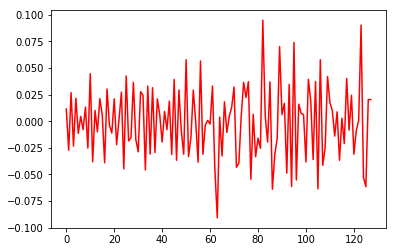

In [47]:
import matplotlib.pyplot as plt
kernal1=ker[0].reshape(128,)
plt.plot(kernal1, c='r')
plt.show()

In [36]:
model.layers[1].output

<tf.Tensor 'time_distributed/Identity:0' shape=(None, None, 10100, 1) dtype=float32>

In [50]:
model1 = Model(inputs=model.inputs, outputs=model.layers[1].output)

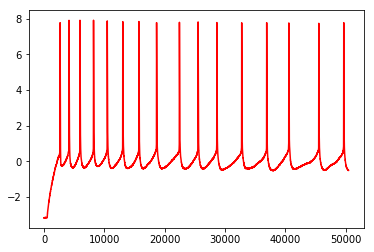

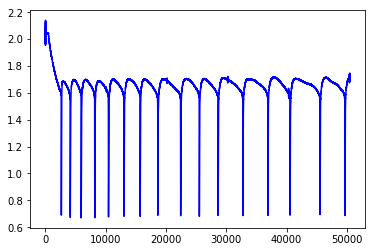

In [51]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()

i=0
y=x_test[sequence_length*i:(sequence_length*i)+sequence_length]
    # x=x_test[50500]
    # print("Min:", np.min(y))
    # print("Max:", np.max(y))
y=scaler.fit_transform(y)
# print("Min:", np.min(y))
# print("Max:", np.max(y))
len(y)
y=y.reshape(1,5,10100,1)
y_to=y.reshape(sequence_length,)
plt.plot(y_to, c='r')
plt.show()
predicted = model1.predict(y)
    # print("Min:", np.min(predicted))
    # print("Max:", np.max(predicted))
predicted=predicted.reshape(sequence_length,)
plt.plot(predicted,c='b',label='predicted')
plt.show()

In [ ]:
import pickle 

def read_pickleFile(filename):
    # returns dump pickle file object
    with open (filename,'rb') as pf:
        new_data=pickle.load(pf)
    return new_data

In [ ]:
filename='human_cells_170_stimulus.pkl'
new_data=read_pickleFile(filename)

In [17]:
model.evaluate_generator(generator=test_generator,steps=217)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


0.9962116045885921

In [18]:
path_checkpoint = 'checkpoint_conlv1D_fina.keras'
model.load_weights(path_checkpoint)

In [19]:
model.evaluate_generator(generator=test_generator,steps=217)

  ...
    to  
  ['...']


0.0020653577280029104

In [ ]:
x_prediction_test=x_test[50500:50500+50500].reshape((1,1,x_test[50500:50500+50500].shape[0],x_test[50500:50500+50500].shape[1]))

In [49]:
time=time_df.iloc[0:50500].values
# time=time[0::20]
time=time.reshape((time.shape[1],time.shape[0]))
len(time[0])

50500

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y=x_test[sequence_length*100:(sequence_length*100)+sequence_length]
# x=x_test[50500]
print("Min:", np.min(y))
print("Max:", np.max(y))
y=scaler.fit_transform(y)
print("Min:", np.min(y))
print("Max:", np.max(y))
len(y)
y=y.reshape(1,2525,1)

y_to=y.reshape(sequence_length,)

Min: -77.53126
Max: 21.468752
Min: -2.635045
Max: 6.3127728


In [74]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
for i in range(0,200,2):
    y=x_test[sequence_length*i:(sequence_length*i)+sequence_length]
    # x=x_test[50500]
    # print("Min:", np.min(y))
    # print("Max:", np.max(y))
    y=scaler.fit_transform(y)
    # print("Min:", np.min(y))
    # print("Max:", np.max(y))
    len(y)
    y=y.reshape(1,2525,1)

    y_to=y.reshape(sequence_length,)
    predicted = model.predict(y)
    # print("Min:", np.min(predicted))
    # print("Max:", np.max(predicted))
    predicted=predicted.reshape(sequence_length,)
    plt.scatter(time[0], predicted,c='b',label='predicted')
    plt.plot(time[0],y_to, c='r',label='true')
    plt.legend()
    plt.savefig('/home/sakrishnaa20/samples/cons_lstm'+str(i))
    plt.cla()
    plt.clf() 

<Figure size 432x288 with 0 Axes>

In [50]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
for i in range(0,200,2):
    y=x_test[sequence_length*i:(sequence_length*i)+sequence_length]
    # x=x_test[50500]
    # print("Min:", np.min(y))
    # print("Max:", np.max(y))
    y=scaler.fit_transform(y)
    # print("Min:", np.min(y))
    # print("Max:", np.max(y))
    len(y)
    y=y.reshape(1,50500,1)

    y_to=y.reshape(sequence_length,)
    predicted = model.predict(y)
    # print("Min:", np.min(predicted))
    # print("Max:", np.max(predicted))
    predicted=predicted.reshape(sequence_length,)
    plt.scatter(time[0], predicted,c='b',label='predicted')
    plt.plot(time[0],y_to, c='r',label='true')
    plt.legend()
    plt.savefig('/home/sakrishnaa20/samples/cons_lstm/'+str(i))
    plt.cla()
    plt.clf() 

<Figure size 432x288 with 0 Axes>

Min: -3.946995
Max: 6.6921062


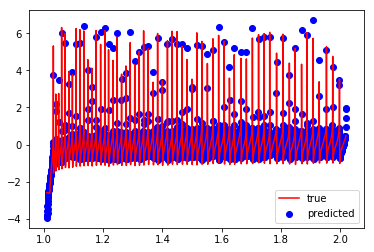

In [78]:

predicted = model.predict(y)
print("Min:", np.min(predicted))
print("Max:", np.max(predicted))
predicted=predicted.reshape(sequence_length,)
plt.scatter(time[0], predicted,c='b',label='predicted')
plt.plot(time[0],y_to, c='r',label='true')
plt.legend()
plt.show()
# plt.savefig('/home/sakrishnaa20/samples/cons_lstm'+str(1))

In [ ]:
x_prediction_test.shape

In [ ]:
y_pred=model.predict(x_prediction_test)

In [ ]:
print(y_pred.shape)
print(y_pred[0][0])
print("Min:", np.min(y_pred))
print("Max:", np.max(y_pred))

In [ ]:
y_true=y_test[50500:50500+50500]/100

y_scaler = MinMaxScaler() 
print("Min:", np.min(y_true))
print("Max:", np.max(y_true))
# y_true=y_scaler.fit_transform(y_true)
y_true=y_true.reshape((1,y_true.shape[1],y_true.shape[0]))


In [ ]:
#for plottind time vs all responses
time=time_df.iloc[0:50500].values
time=time.reshape((time.shape[1],time.shape[0]))
time

In [ ]:
import matplotlib.pyplot as plt
plt.plot(time[0],y_true[0][0],marker='', color='red')
plt.plot(time[0],y_pred[0][0], marker='', color='blue')
plt.legend()
plt.show()

In [8]:
!pip install tensorflow

     |████████████████████████████████| 421.8MB 24kB/s  eta 0:00:011   |▉                               | 11.5MB 5.0MB/s eta 0:01:23     |███████████████████████████████ | 407.2MB 146kB/s eta 0:01:40
     |████████████████████████████████| 20.0MB 80kB/s s eta 0:00:01
     |████████████████████████████████| 26.0MB 23.2MB/s eta 0:00:01
ERROR: scikit-image 0.15.0 requires pillow>=4.3.0, which is not installed.
ERROR: imageio 2.6.1 requires pillow, which is not installed.
ERROR: tensorflow-io 0.9.10 has requirement tensorflow==2.1.0rc0, but you'll have tensorflow 2.1.0 which is incompatible.
  Found existing installation: numpy 1.15.1
    Uninstalling numpy-1.15.1:
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: 'METADATA'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import tensorflow
sess = tensorflow.InteractiveSession()
saver = tensorflow.train.import_meta_graph('checkpoint_conv1d.keras')
saver.restore(sess, 'checkpoint_conv1d.keras')
# get the graph
g = tensorflow.get_default_graph()
# w1 = g.get_tensor_by_name('some_variable_name as per your definition in the model')

AttributeError: module 'tensorflow' has no attribute 'InteractiveSession'